In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt để biểu đồ hiển thị đẹp hơn
sns.set(style="whitegrid")

In [5]:
import pandas as pd

# Đoạn code này sẽ in ra tên tất cả các sheet trong file Excel
file_path = 'online_retail_II.xlsx'
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Online Retail']


In [8]:
import pandas as pd

file_path = 'online_retail_II.xlsx'

# Đọc trực tiếp sheet duy nhất có tên 'Online Retail' vào DataFrame
df = pd.read_excel(file_path, sheet_name='Online Retail')

# In ra 5 dòng đầu tiên để kiểm tra xem đã đọc thành công chưa
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
# Kiểm tra thông tin tổng quan: Xem kiểu dữ liệu của các cột và số lượng giá trị không rỗng.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# Thống kê mô tả: Xem các thống kê cơ bản cho các cột số.
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [11]:
# Kiểm tra số lượng giá trị thiếu ở mỗi cột
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
# Cột Customer ID thiếu rất nhiều giá trị. Vì phân tích hành vi khách hàng là rất quan trọng, chúng ta sẽ xóa các dòng không có ID
df.dropna(subset=['CustomerID'], inplace=True)

In [20]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
# Loại bỏ các đơn hàng bị hủy (có Quantity < 0)
df = df[df['Quantity'] > 0]

In [23]:
# Loại bỏ các trường hợp Price bằng 0
df = df[df['UnitPrice'] > 0]

In [24]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [57]:
# Chuyển cột InvoiceDate về đúng định dạng thời gian (nếu chưa làm)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# --- TẠO CÁC CỘT YEAR VÀ MONTH ---
# Đoạn code quan trọng bạn cần chạy lại
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# In ra 5 dòng đầu 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,TotalPrice,Hour,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,8,Wednesday


In [30]:
# Tạo cột 'TotalPrice' bằng cách nhân số lượng với đơn giá
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Kiểm tra lại 5 dòng đầu tiên để chắc chắn cột mới đã được tạo
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34


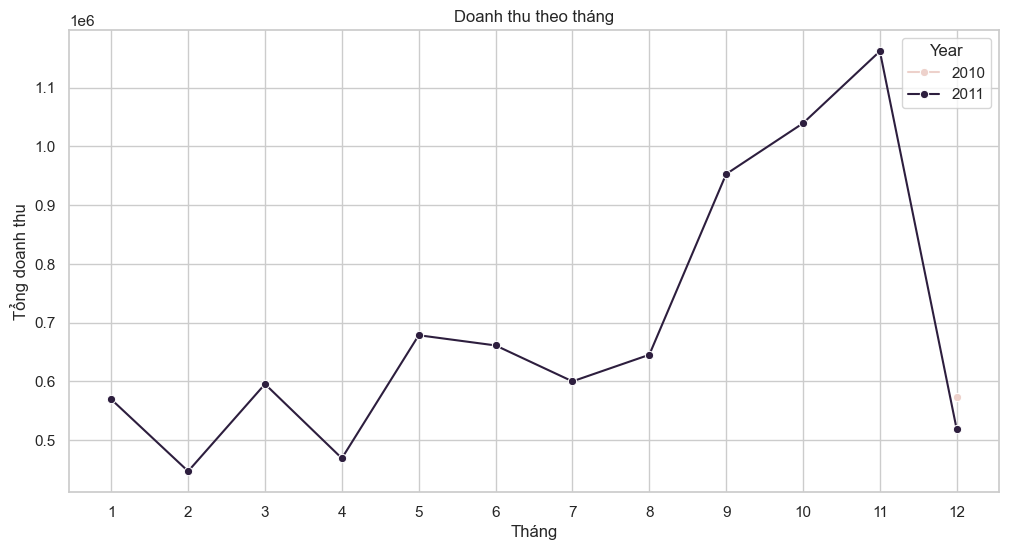

In [31]:
# Doanh thu theo tháng
monthly_revenue = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="TotalPrice", hue="Year", data=monthly_revenue, marker='o')
plt.title('Doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng doanh thu')
plt.xticks(range(1, 13))
plt.show()

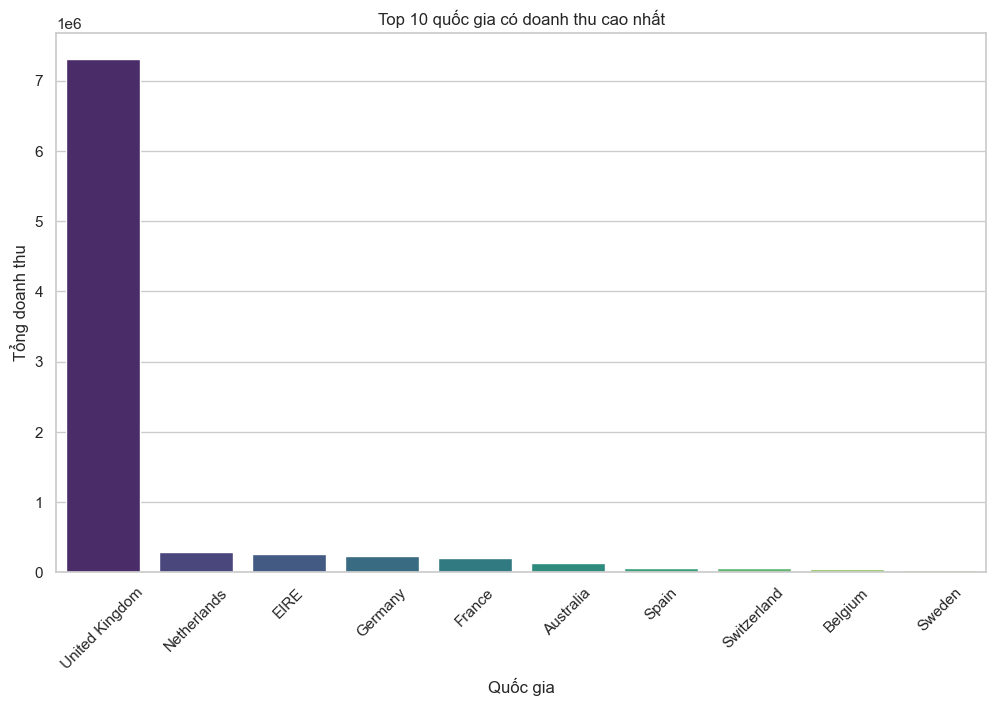

In [33]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=country_revenue.index, y=country_revenue.values, hue=country_revenue.index, palette='viridis', legend=False)
plt.title('Top 10 quốc gia có doanh thu cao nhất')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45)
plt.show()

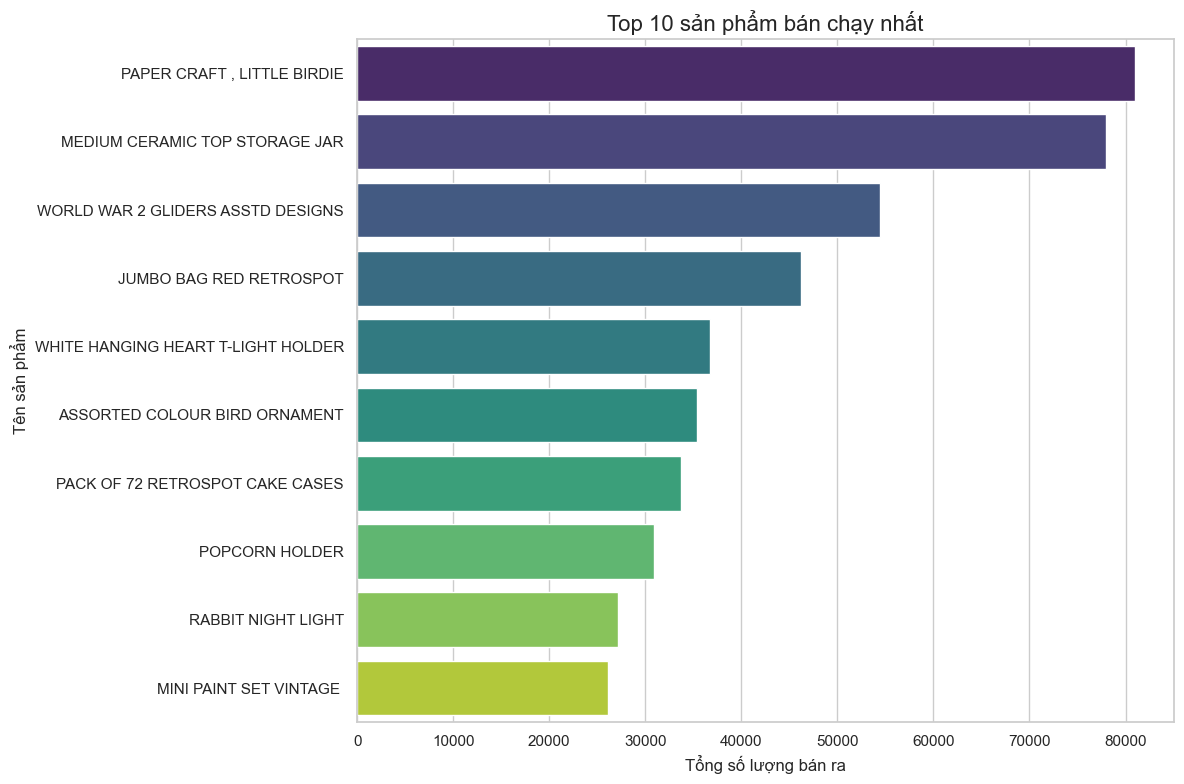

In [56]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', legend=False)

plt.title('Top 10 sản phẩm bán chạy nhất', fontsize=16)

plt.xlabel('Tổng số lượng bán ra', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.tight_layout() 
plt.show()

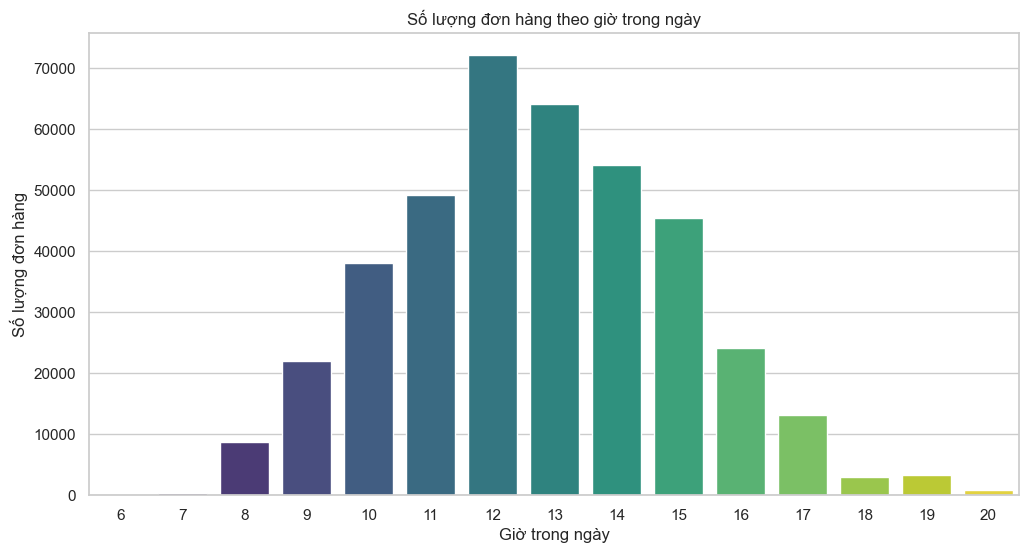

In [41]:
# Bước 1: Đếm số lượng đơn hàng cho mỗi giờ và sắp xếp theo giờ
hourly_counts = df['Hour'].value_counts().sort_index()

# Bước 2: Dùng barplot để vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, hue=hourly_counts.index, palette='viridis', legend=False)
plt.title('Số lượng đơn hàng theo giờ trong ngày')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số lượng đơn hàng') 
plt.show()

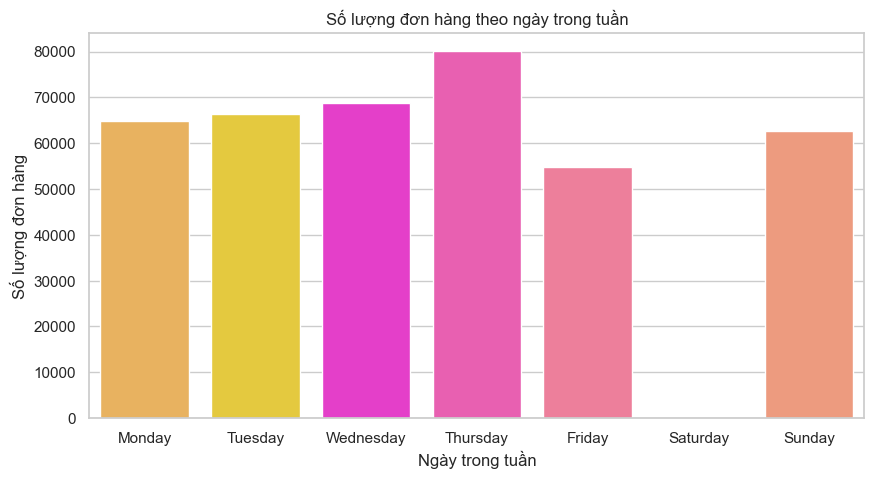

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Weekday', data=df, hue='Weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='spring', legend=False)
plt.title('Số lượng đơn hàng theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng đơn hàng')
plt.show()

In [50]:
# Tính tổng doanh thu cho mỗi sản phẩm
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Tính tổng số lượng bán ra cho mỗi sản phẩm
product_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

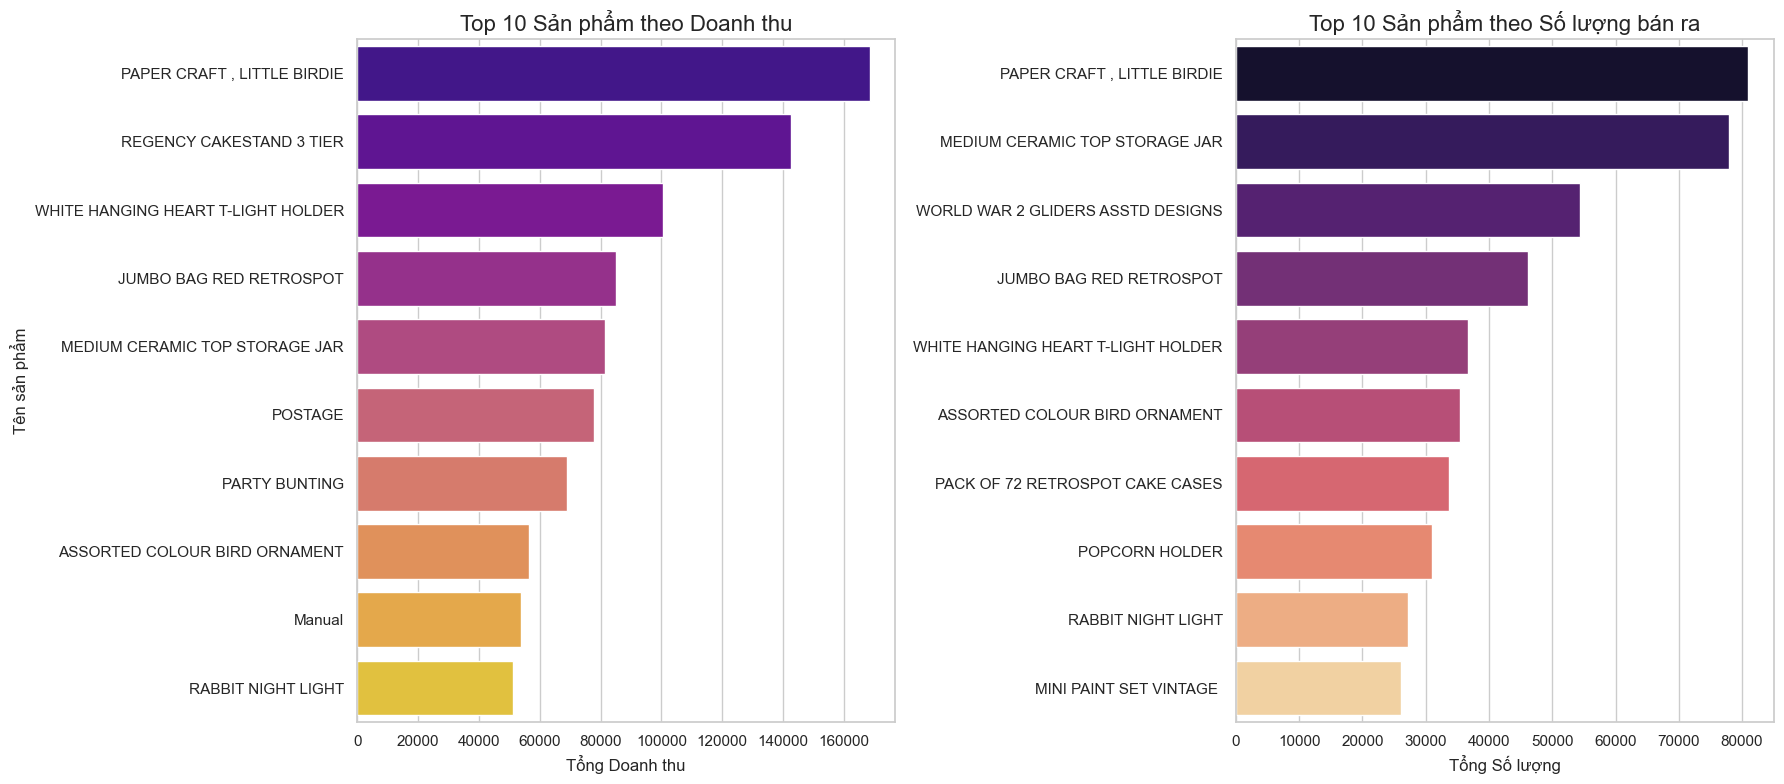

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(ax=ax[0], x=product_revenue.values, y=product_revenue.index, hue=product_revenue.index, palette='plasma', legend=False)
ax[0].set_title('Top 10 Sản phẩm theo Doanh thu', fontsize=16)
ax[0].set_xlabel('Tổng Doanh thu', fontsize=12)
ax[0].set_ylabel('Tên sản phẩm', fontsize=12)

sns.barplot(ax=ax[1], x=product_quantity.values, y=product_quantity.index, hue=product_quantity.index, palette='magma', legend=False)
ax[1].set_title('Top 10 Sản phẩm theo Số lượng bán ra', fontsize=16)
ax[1].set_xlabel('Tổng Số lượng', fontsize=12)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [61]:
import datetime as dt

snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, 
    'InvoiceNo': 'nunique', 
    'TotalPrice': 'sum' 
})

rfm_data.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


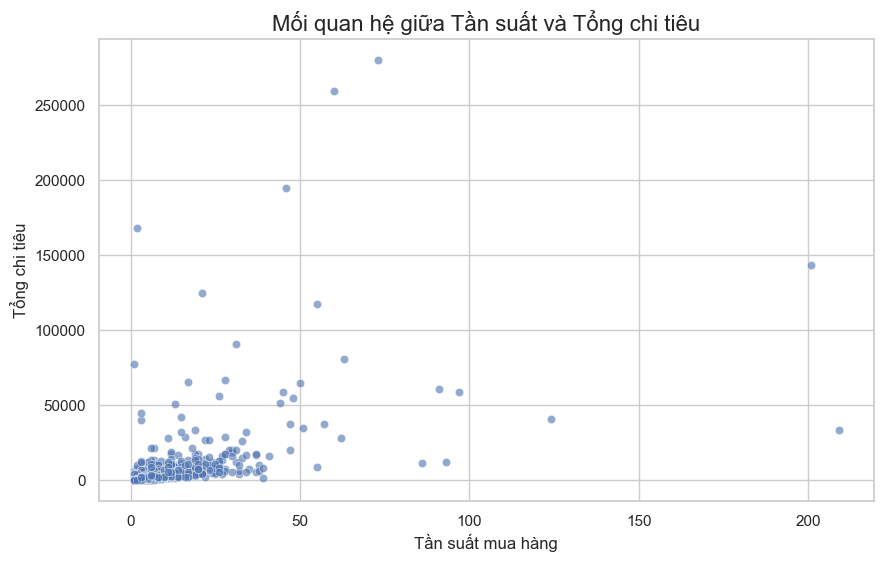

In [63]:
# Biểu đồ Phân tán (Scatter Plot): Tần suất vs doanh thu
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x='InvoiceNo', y='TotalPrice', alpha=0.6)

plt.title('Mối quan hệ giữa Tần suất và Tổng chi tiêu', fontsize=16)
plt.xlabel('Tần suất mua hàng', fontsize=12)
plt.ylabel('Tổng chi tiêu', fontsize=12)
plt.show()

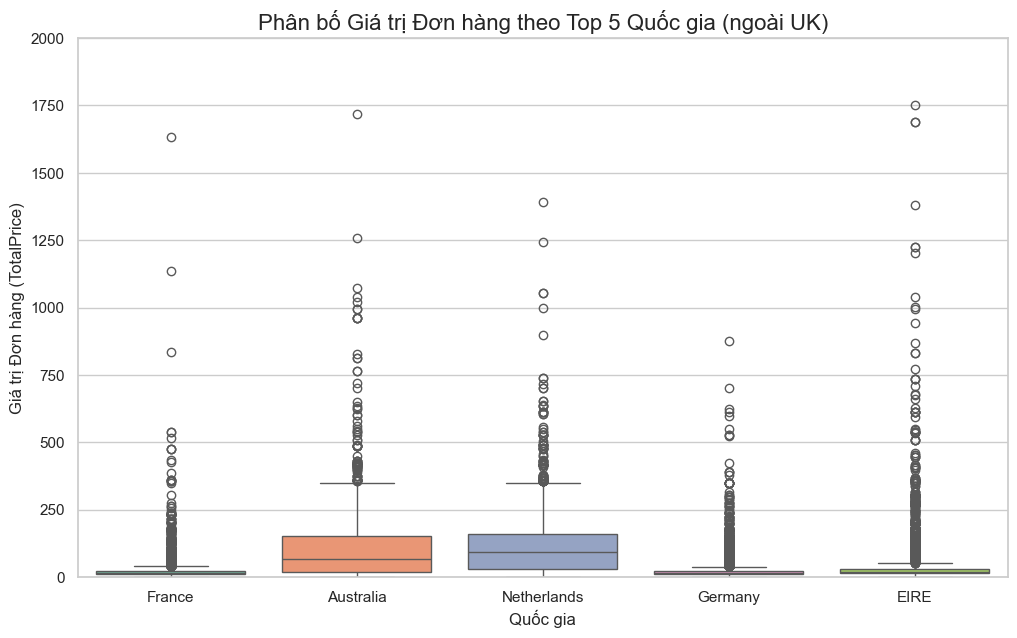

In [65]:
# Biểu đồ hộp (Boxplot) để so sánh phân bố Doanh thu theo quốc gia
top_countries_for_boxplot = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5).index

df_top_countries = df[df['Country'].isin(top_countries_for_boxplot)]

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top_countries, x='Country', y='TotalPrice', hue='Country', palette='Set2', legend=False)

plt.title('Phân bố Giá trị Đơn hàng theo Top 5 Quốc gia (ngoài UK)', fontsize=16)
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Giá trị Đơn hàng (TotalPrice)', fontsize=12)
plt.ylim(0, 2000)
plt.show()

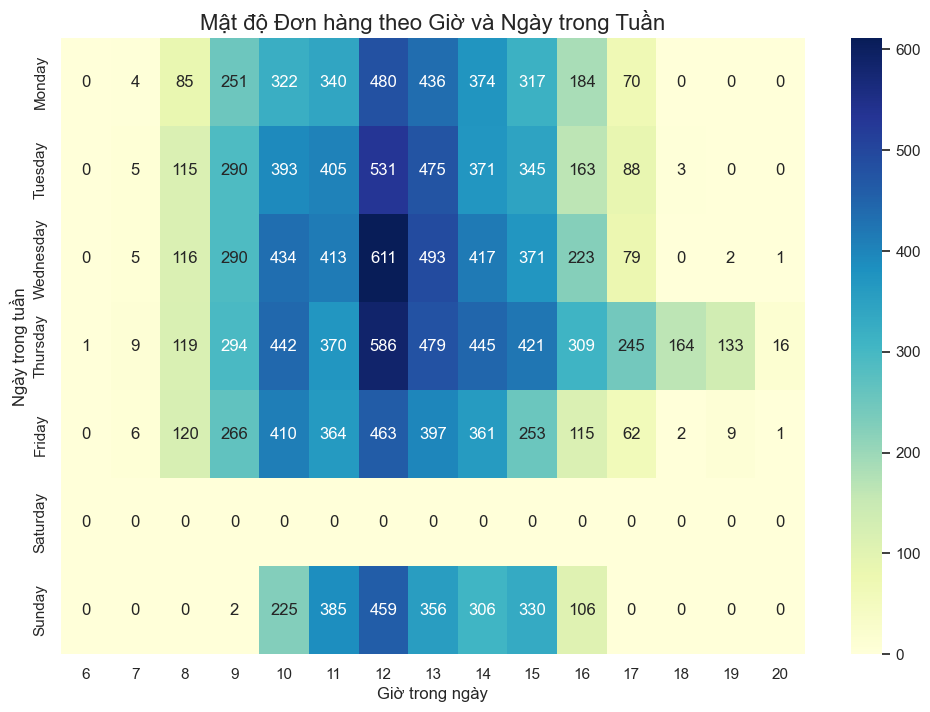

In [67]:
# Heatmap về mật độ mua sắm
heatmap_data = df.groupby(['Hour', 'Weekday'])['InvoiceNo'].nunique().unstack()


days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

heatmap_data = heatmap_data.reindex(columns=days_order).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', annot=True, fmt='g')

plt.title('Mật độ Đơn hàng theo Giờ và Ngày trong Tuần', fontsize=16)
plt.xlabel('Giờ trong ngày', fontsize=12)
plt.ylabel('Ngày trong tuần', fontsize=12)
plt.show()